<h1 align=center><font size = 5>Capstone Project - The Battle of Neighborhoods</font></h1>

## Introduction

There’s an influx of tech companies moving to Austin. Lower costs, laid-back lifestyle continue to draw tech companies to Austin, Texas. According to the Austin Chamber of Commerce, 58 major companies relocated to the Austin area in 2019 alone – not including tech giants such as Apple, Amazon, and Google, who opened new offices in the region. Tech companies aren’t the only ones who are flocking to Austin, either. Nearly 100 other companies in various sectors have announced that they are moving to the area or expanding their local operations in the coming year. Tens of thousands of well-paying new jobs are on their way to Austin, with more being announced every day.

## Business Problem


All those jobs are going to require smart, motivated, skilled workers to fill them. And those workers need places to live and restaurants or food joints to eat. The objective of this capstone project is to find the most suitable location for an entrepreneur to open a new Italian restaurant in Austin, Texas. By using data science and machine learning methods such as clustering, this project will recommend a best suitable location to open a new Italian restaurant. As with any business, restaurant in particular location is of utmost importance, so we will take serveral things into consideration and suggest an optimal location.

## Data

Following data is required for this project:

<li>List of Austin neighborhoods scraped from Wikipedia page that contains list of Austin neighborhoods</li>
<li>Latitude and Longitude of these neighborhoods, which can be obtained from Geocoder package</li>
<li>Venue data related to these neighborhoods that can be obtained using Foursquare API</li>


## Methodology

In this project the first step will be to collect data on the neighbourhoods of Austin from <a href=\"https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods"> Wikipedia </a>. Since the data is not available preformatted, it has to be scraped from Wiki webpage. The location coordinates of each neighbourhood will then be obtained with the help of GeoPy Nominatim geolocator and appended to the neighbourhood data. Using this data, a folium map of Austin neighbourhoods will be created.

The second step will be to explore each of neighbourhoods and their venues using Foursquare location data. The venues of the neighbourhoods will be analyzed in detail and patterns will be discovered. This discovery of patterns will be carried out by grouping the neighbourhoods using k-means clustering. K-means clustering algorithm identifies k number of centeriods, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. It is one of the simplest and popular unsupervised machine learning algorithms and it is highly suited for this project as well.Following this, each cluster will be examined and a decision will be made regarding which cluster fits our need. The factor that will determine this is the frequency of occurrence of restaurants and other food venues within the cluster.

Once a cluster is picked, the neighbourhoods in that cluster will be investigated with regards to the number of Italian restaurants in its vicinity. The results of the analysis will highlight potential neighbourhoods where an Italian restaurant may be opened based on geographical location and proximity to competitors.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import lxml.html as lh
import re

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libgcc-ng-9.3.0            |      h5dbcf3e_17         7.8 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1i             |       h7f98852_0         2.1 MB  conda-forge
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    libgomp-9.3.0              |      h5dbcf3e_17         378 KB  conda-forge
    _openmp_mutex-4.5          |            1_gnu          22 KB  conda-forge
    certifi-2020.

#### Load the data from Wikipedia WebPage.
*unable to find any structured data on the web related to Austin neighborhoods, so the data from wikipedia needs lot of scraping and cleansing



In [2]:
List_url = "https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods"
source = requests.get(List_url).text
soup = BeautifulSoup(source,"html.parser")

#### Create a Dataframe to store the data



In [3]:
import re
lis_toc = []

#capture all table of content list, so they can be excluded from the location dataframe
for tag in soup.find_all('li', class_=re.compile("toc")):
    lis_toc.append(tag.text)
df_toc = pd.DataFrame(lis_toc)
df_toc.columns = ['Neighborhood']

#capture all li content, Woodstone Village is the last neighborhood in Wikipedia
lis_neighbor = []
for tag in soup.find_all('li'):
    lis_neighbor.append(tag.text)
    if(tag.text == "Woodstone Village"):
        break
df_neighbors = pd.DataFrame(lis_neighbor)
df_neighbors.columns = ['Neighborhood']

# remove table of content list from the neighborhood dataframe leaving with the right neighborhoods
cond = df_neighbors['Neighborhood'].isin(df_toc['Neighborhood'])
df_neighbors.drop(df_neighbors[cond].index, inplace = True)
df_neighbors.reset_index(inplace=True,drop=True)

#Wiki text for these 4 neighborhoods needs to be cleansed
df_neighbors.loc[89,'Neighborhood'] ='Sunset Valley'
df_neighbors.loc[83,'Neighborhood'] ='Slaughter-Manchaca'
df_neighbors.loc[68,'Neighborhood'] ='South Lamar'
df_neighbors.loc[43,'Neighborhood'] ='Great Hills'

df_neighbors

Neighborhood
0                    Bryker Woods
1   Clarksville Historic District
2                 Caswell Heights
3                 Downtown Austin
4                       Eastwoods
5                         Hancock
6                        Heritage
7     Hyde Park Historic District
8                    Judge's Hill
9              Lower Waller Creek
10               North University
11                Oakmont Heights
12                    Old Enfield
13               Old Pecan Street
14                Old West Austin
15                Original Austin
16       Original West University
17              Pemberton Heights
18                       Rosedale
19                       Ridgelea
20                       Ridgetop
21                    Shoal Crest
22  Shadow Lawn Historic District
23                  West Downtown
24                      Allandale
25                 Balcones Woods
26                Barrington Oaks
27            Battle Bend Springs
28                      Brentwood
29                      Crestview
30           Estates of Brentwood
31                        Hancock
32                       Highland
33                   North Burnet
34                   North Campus
35                    North Lamar
36                     North Loop
37              North Shoal Creek
38                     Saint John
39                         Wooten
40                  Windsor Hills
41                   Windsor Park
42                   Canyon Creek
43                    Great Hills
44                Northwest Hills
45                    Copperfield
46                  Steiner Ranch
47                   Wells Branch
48            Central East Austin
49              East Cesar Chavez
50                  East Congress
51                       East End
52                   French Place
53                        Govalle
54                    Gracy Woods
55                          Holly
56                        Mueller
57                       Far West
58                      Tarrytown
59                  West Congress
60                       West End
61    West Line Historic District
62                   Barton Creek
63                   Barton Hills
64                  Bouldin Creek
65                         Dawson
66                        Galindo
67                 South Congress
68                    South Lamar
69               South River City
70                 Travis Heights
71                         Zilker
72          East Riverside-Oltorf
73                     Montopolis
74                Pleasant Valley
75                   Dove Springs
76                    Onion Creek
77                 South Manchaca
78               Southeast Austin
79              Southpark Meadows
80                   Cherry Creek
81                 Circle C Ranch
82                       Oak Hill
83             Slaughter-Manchaca
84                  Kincheonville
85           The Ridge at Lantana
86                      Maple Run
87                        Sendera
88                   Shady Hollow
89                  Sunset Valley
90              Tanglewood Forest
91                 Travis Country
92                       Westgate
93              Woodstone Village

In [4]:
# define the data frame columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the data frame
geo_neighborhoods = pd.DataFrame(columns=column_names)

In [5]:
geolocator = Nominatim(user_agent="Austin_Explorer",timeout=5)
for i in range(0,len(df_neighbors)):
    
    address = df_neighbors.Neighborhood[i]+', Austin'
    location = geolocator.geocode(address)
    if location == None:
        latitude = 0
        longitude = 0
    else:
        latitude = location.latitude
        longitude = location.longitude

    geo_neighborhoods = geo_neighborhoods.append({'Neighborhood': df_neighbors.Neighborhood[i],
                                              'Latitude': latitude,
                                              'Longitude': longitude}, ignore_index=True)
geo_neighborhoods

Neighborhood   Latitude   Longitude
0                    Bryker Woods  30.305246  -97.754585
1   Clarksville Historic District   0.000000    0.000000
2                 Caswell Heights   0.000000    0.000000
3                 Downtown Austin  30.268054  -97.744764
4                       Eastwoods  30.290562  -97.731418
5                         Hancock  30.295896  -97.724768
6                        Heritage  26.188527  -97.991214
7     Hyde Park Historic District   0.000000    0.000000
8                    Judge's Hill   0.000000    0.000000
9              Lower Waller Creek  29.802320  -96.076820
10               North University  35.600543  -77.349401
11                Oakmont Heights  30.311989  -97.754070
12                    Old Enfield  30.284864  -97.759106
13               Old Pecan Street  29.890562  -96.488786
14                Old West Austin  30.296822  -97.754851
15                Original Austin  41.895032  -87.752002
16       Original West University   0.000000    0.000000
17              Pemberton Heights  49.249379 -122.868627
18                       Rosedale  30.313390  -97.744898
19                       Ridgelea  30.310355  -97.750690
20                       Ridgetop  30.311527  -97.716418
21                    Shoal Crest  30.296775  -97.747934
22  Shadow Lawn Historic District   0.000000    0.000000
23                  West Downtown  30.268054  -97.744764
24                      Allandale  30.339309  -97.746972
25                 Balcones Woods  30.406974  -97.736660
26                Barrington Oaks  30.429022  -97.774184
27            Battle Bend Springs   0.000000    0.000000
28                      Brentwood  30.331264  -97.736465
29                      Crestview  30.345829  -97.724761
30           Estates of Brentwood   0.000000    0.000000
31                        Hancock  30.295896  -97.724768
32                       Highland  30.328895  -97.715847
33                   North Burnet  30.932782  -98.175601
34                   North Campus  44.045621  -82.992058
35                    North Lamar  30.369852  -97.687261
36                     North Loop  30.317882  -97.718758
37              North Shoal Creek  30.364689  -97.735024
38                     Saint John  30.332516  -97.693407
39                         Wooten  30.361252  -97.722846
40                  Windsor Hills  30.362072  -97.679214
41                   Windsor Park  30.313549  -97.691095
42                   Canyon Creek  30.374453  -97.859800
43                    Great Hills  30.391595  -97.757770
44                Northwest Hills  30.355545  -97.768595
45                    Copperfield  30.390705  -97.659055
46                  Steiner Ranch  30.390104  -97.871763
47                   Wells Branch  30.402557  -97.682255
48            Central East Austin  30.272734  -97.726494
49              East Cesar Chavez  30.255896  -97.731707
50                  East Congress  30.210398  -97.766052
51                       East End  30.202662  -97.655919
52                   French Place  30.286138  -97.719715
53                        Govalle  30.258676  -97.701216
54                    Gracy Woods  30.401502  -97.699671
55                          Holly  30.255951  -97.717052
56                        Mueller  30.296524  -97.700203
57                       Far West  30.352834  -97.754008
58                      Tarrytown  30.303125  -97.770485
59                  West Congress  30.215382  -97.772770
60                       West End  41.870852  -87.776408
61    West Line Historic District  30.262724  -97.743863
62                   Barton Creek  30.265638  -97.763966
63                   Barton Hills  30.251571  -97.784106
64                  Bouldin Creek  30.255667  -97.755481
65                         Dawson  30.233719  -97.761683
66                        Galindo  30.235578  -97.768515
67                 South Congress  30.238521  -97.750460
68                    South Lamar  30.236389  -97.782647
69               South River Ci

### Data Cleaning Remove Neighborhoodd with missing geo coordinates



In [6]:

city = "Austin, TX"
geolocator = Nominatim(user_agent="austin_explorer")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin city are 30.2711286, -97.7436995.


In [7]:
geo_neighborhoods['Latitude']=geo_neighborhoods['Latitude'].astype(float)
geo_neighborhoods['Longitude']=geo_neighborhoods['Longitude'].astype(float)

geo_neighborhoods=geo_neighborhoods[(geo_neighborhoods.Latitude>29.8) & (geo_neighborhoods.Latitude<30.7) & (geo_neighborhoods.Longitude<-97)] 
geo_neighborhoods.reset_index(inplace=True,drop=True)
geo_neighborhoods

Neighborhood   Latitude  Longitude
0                  Bryker Woods  30.305246 -97.754585
1               Downtown Austin  30.268054 -97.744764
2                     Eastwoods  30.290562 -97.731418
3                       Hancock  30.295896 -97.724768
4               Oakmont Heights  30.311989 -97.754070
5                   Old Enfield  30.284864 -97.759106
6               Old West Austin  30.296822 -97.754851
7                      Rosedale  30.313390 -97.744898
8                      Ridgelea  30.310355 -97.750690
9                      Ridgetop  30.311527 -97.716418
10                  Shoal Crest  30.296775 -97.747934
11                West Downtown  30.268054 -97.744764
12                    Allandale  30.339309 -97.746972
13               Balcones Woods  30.406974 -97.736660
14              Barrington Oaks  30.429022 -97.774184
15                    Brentwood  30.331264 -97.736465
16                    Crestview  30.345829 -97.724761
17                      Hancock  30.295896 -97.724768
18                     Highland  30.328895 -97.715847
19                  North Lamar  30.369852 -97.687261
20                   North Loop  30.317882 -97.718758
21            North Shoal Creek  30.364689 -97.735024
22                   Saint John  30.332516 -97.693407
23                       Wooten  30.361252 -97.722846
24                Windsor Hills  30.362072 -97.679214
25                 Windsor Park  30.313549 -97.691095
26                 Canyon Creek  30.374453 -97.859800
27                  Great Hills  30.391595 -97.757770
28              Northwest Hills  30.355545 -97.768595
29                  Copperfield  30.390705 -97.659055
30                Steiner Ranch  30.390104 -97.871763
31                 Wells Branch  30.402557 -97.682255
32          Central East Austin  30.272734 -97.726494
33            East Cesar Chavez  30.255896 -97.731707
34                East Congress  30.210398 -97.766052
35                     East End  30.202662 -97.655919
36                 French Place  30.286138 -97.719715
37                      Govalle  30.258676 -97.701216
38                  Gracy Woods  30.401502 -97.699671
39                        Holly  30.255951 -97.717052
40                      Mueller  30.296524 -97.700203
41                     Far West  30.352834 -97.754008
42                    Tarrytown  30.303125 -97.770485
43                West Congress  30.215382 -97.772770
44  West Line Historic District  30.262724 -97.743863
45                 Barton Creek  30.265638 -97.763966
46                 Barton Hills  30.251571 -97.784106
47                Bouldin Creek  30.255667 -97.755481
48                       Dawson  30.233719 -97.761683
49                      Galindo  30.235578 -97.768515
50               South Congress  30.238521 -97.750460
51                  South Lamar  30.236389 -97.782647
52             South River City  30.249443 -97.745558
53               Travis Heights  30.244474 -97.744000
54                       Zilker  30.254236 -97.769581
55        East Riverside-Oltorf  30.230462 -97.724321
56                   Montopolis  30.224946 -97.703444
57              Pleasant Valley  30.231001 -97.715789
58                 Dove Springs  30.186489 -97.738016
59                  Onion Creek  30.168117 -97.744817
60               South Manchaca  30.219541 -97.783883
61             Southeast Austin  30.202593 -97.737147
62            Southpark Meadows  30.162266 -97.792987
63                 Cherry Creek  30.197113 -97.824812
64                     Oak Hill  30.271129 -97.743700
65                    Maple Run  30.206024 -97.851406
66                      Sendera  30.195272 -97.861884
67                 Shady Hollow  30.154184 -97.854180
68                Sunset Valley  30.225765 -97.803617
69            Tanglewood Forest  30.174655 -97.839173
70               Travis Country  30.251699 -97.830134
71                     Westgate  30.223210 -97.797043
72            Woodstone Village  30.205012 -97.840599

### Create a map of Austin with neighborhoods



In [8]:
Austin_map = folium.Map(location=[latitude, longitude], zoom_start=10)
Austin_map

### Add markers for Neighborhoods



In [9]:
for lat, lng, neighborhood in zip(
        geo_neighborhoods['Latitude'], 
        geo_neighborhoods['Longitude'],         
        geo_neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Austin_map)  

Austin_map


### Configure Foursquare handle with required Credentials and Version
*client_id and client_secret removed prior to Github commit

In [10]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180605'

In [11]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
austin_venues = getNearbyVenues(names=geo_neighborhoods['Neighborhood'],
                                   latitudes=geo_neighborhoods['Latitude'],
                                   longitudes=geo_neighborhoods['Longitude']
                                  )
austin_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Bryker Woods              30.305246              -97.754585   
1  Bryker Woods              30.305246              -97.754585   
2  Bryker Woods              30.305246              -97.754585   
3  Bryker Woods              30.305246              -97.754585   
4  Bryker Woods              30.305246              -97.754585   

                        Venue  Venue Latitude  Venue Longitude  \
0                Olive & June       30.307450       -97.751046   
1     Tiny's Milk And Cookies       30.305971       -97.749950   
2               Tiny Boxwoods       30.306058       -97.749789   
3  Define Body & Mind: Austin       30.308680       -97.753964   
4       Austin Flower Company       30.307787       -97.751224   

        Venue Category  
0   Italian Restaurant  
1               Bakery  
2  American Restaurant  
3    Recreation Center  
4          Flower Shop

In [13]:
venue_count = austin_venues.groupby('Neighborhood').count()
venue_count.drop(venue_count.columns[[0,1,3,4,5]], axis=1,inplace=True)
venue_count.reset_index(inplace=True)

suitable_neighborhoods=venue_count[(venue_count.Venue>=10)]
suitable_neighborhoods.reset_index(drop=True,inplace=True)
suitable_neighborhoods

Neighborhood  Venue
0                  Barton Creek     41
1                 Bouldin Creek     14
2                     Brentwood     25
3                  Bryker Woods     24
4           Central East Austin     30
5                        Dawson     12
6               Downtown Austin    100
7             East Cesar Chavez     18
8         East Riverside-Oltorf     12
9                     Eastwoods     19
10                     Far West     23
11                 French Place     25
12                      Govalle     20
13                  Gracy Woods     11
14                     Highland     15
15                        Holly     46
16                   North Loop     31
17                     Oak Hill     45
18              Oakmont Heights     14
19                     Ridgelea     29
20                     Ridgetop     30
21                     Rosedale     16
22                  Shoal Crest     12
23               South Congress     32
24             South River City     39
25            Southpark Meadows     44
26                West Congress     14
27                West Downtown    100
28  West Line Historic District    100
29                 Windsor Park     13
30            Woodstone Village     11

## Let's review all venues in the suitable neighborhoods



In [14]:
majorvenues_list=suitable_neighborhoods['Neighborhood'].values.tolist()

for i in range(0,len(austin_venues)):

    if austin_venues.iloc[i,0] not in majorvenues_list:
        austin_venues.iloc[i,0]='TO DROP'

austin_venues=austin_venues[austin_venues.Neighborhood!='TO DROP']
austin_venues.reset_index(drop=True,inplace=True)
austin_venues

Neighborhood  Neighborhood Latitude  \
0                   Bryker Woods              30.305246   
1                   Bryker Woods              30.305246   
2                   Bryker Woods              30.305246   
3                   Bryker Woods              30.305246   
4                   Bryker Woods              30.305246   
5                   Bryker Woods              30.305246   
6                   Bryker Woods              30.305246   
7                   Bryker Woods              30.305246   
8                   Bryker Woods              30.305246   
9                   Bryker Woods              30.305246   
10                  Bryker Woods              30.305246   
11                  Bryker Woods              30.305246   
12                  Bryker Woods              30.305246   
13                  Bryker Woods              30.305246   
14                  Bryker Woods              30.305246   
15                  Bryker Woods              30.305246   
16                  Bryker Woods              30.305246   
17                  Bryker Woods              30.305246   
18                  Bryker Woods              30.305246   
19                  Bryker Woods              30.305246   
20                  Bryker Woods              30.305246   
21                  Bryker Woods              30.305246   
22                  Bryker Woods              30.305246   
23                  Bryker Woods              30.305246   
24               Downtown Austin              30.268054   
25               Downtown Austin              30.268054   
26               Downtown Austin              30.268054   
27               Downtown Austin              30.268054   
28               Downtown Austin              30.268054   
29               Downtown Austin              30.268054   
30               Downtown Austin              30.268054   
31               Downtown Austin              30.268054   
32               Downtown Austin              30.268054   
33               Downtown Austin              30.268054   
34               Downtown Austin              30.268054   
35               Downtown Austin              30.268054   
36               Downtown Austin              30.268054   
37               Downtown Austin              30.268054   
38               Downtown Austin              30.268054   
39               Downtown Austin              30.268054   
40               Downtown Austin              30.268054   
41               Downtown Austin              30.268054   
42               Downtown Austin              30.268054   
43               Downtown Austin              30.268054   
44               Downtown Austin              30.268054   
45               Downtown Austin              30.268054   
46               Downtown Austin              30.268054   
47               Downtown Austin              30.268054   
48               Downtown Austin              30.268054   
49               Downtown Austin              30.268054   
50               Downtown Austin              30.268054   
51               Downtown Austin              30.268054   
52               Downtown Austin              30.268054   
53               Downtown Austin              30.268054   
54               Downtown Austin              30.268054   
55               Downtown Austin              30.268054   
56               Downtown Austin              30.268054   
57               Downtown Austin              30.268054   
58               Downtown Austin              30.268054   
59               Downtown Austin              30.268054   
60               Downtown Austin              30.268054   
61               Downtown Austin              30.268054   
62               Downtown Austin              30.268054   
63               Downtown Austin              30.268054   
64               Downtown Austin              30.268054   
65               Downtown Austin              30.268054   
66               Downtown Austin              30.268054   
67      

In [16]:
# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")
#austin_onehot.drop(['Neighborhood'],axis=1,inplace=True) 
#austin_onehot['Neighborhood'] = austin_venues['Neighborhood']
austin_onehot.insert(loc=0, column='Neighborhood', value=austin_venues['Neighborhood'] )
austin_onehot.shape
austin_onehot

Neighborhood  Adult Boutique  African Restaurant  \
0                   Bryker Woods               0                   0   
1                   Bryker Woods               0                   0   
2                   Bryker Woods               0                   0   
3                   Bryker Woods               0                   0   
4                   Bryker Woods               0                   0   
5                   Bryker Woods               0                   0   
6                   Bryker Woods               0                   0   
7                   Bryker Woods               0                   0   
8                   Bryker Woods               0                   0   
9                   Bryker Woods               0                   0   
10                  Bryker Woods               0                   0   
11                  Bryker Woods               0                   0   
12                  Bryker Woods               0                   0   
13                  Bryker Woods               0                   0   
14                  Bryker Woods               0                   0   
15                  Bryker Woods               0                   0   
16                  Bryker Woods               0                   0   
17                  Bryker Woods               0                   0   
18                  Bryker Woods               0                   0   
19                  Bryker Woods               0                   0   
20                  Bryker Woods               0                   0   
21                  Bryker Woods               0                   0   
22                  Bryker Woods               0                   0   
23                  Bryker Woods               0                   0   
24               Downtown Austin               0                   0   
25               Downtown Austin               0                   0   
26               Downtown Austin               0                   0   
27               Downtown Austin               0                   0   
28               Downtown Austin               0                   0   
29               Downtown Austin               0                   0   
30               Downtown Austin               0                   0   
31               Downtown Austin               0                   0   
32               Downtown Austin               0                   0   
33               Downtown Austin               0                   0   
34               Downtown Austin               0                   0   
35               Downtown Austin               0                   0   
36               Downtown Austin               0                   0   
37               Downtown Austin               0                   0   
38               Downtown Austin               0                   0   
39               Downtown Austin               0                   0   
40               Downtown Austin               0                   0   
41               Downtown Austin               0                   0   
42               Downtown Austin               0                   0   
43               Downtown Austin               0                   0   
44               Downtown Austin               0                   0   
45               Downtown Austin               0                   0   
46               Downtown Austin               0                   0   
47               Downtown Austin               0                   0   
48               Downtown Austin               0                   0   
49               Downtown Austin               0                   0   
50               Downtown Austin               0                   0   
51               Downtown Austin               0                   0   
52               Downtown Austin               0                   0   
53               Downtown Austin               0                   0   
54               Downtown Austin               0            

In [17]:
austin_grouped = austin_onehot.groupby('Neighborhood').mean().reset_index()
austin_grouped.head()

Neighborhood  Adult Boutique  African Restaurant  \
0         Barton Creek             0.0            0.000000   
1        Bouldin Creek             0.0            0.071429   
2            Brentwood             0.0            0.000000   
3         Bryker Woods             0.0            0.000000   
4  Central East Austin             0.0            0.000000   

   American Restaurant  Arcade  Art Gallery  Arts & Crafts Store  \
0             0.024390     0.0      0.02439             0.000000   
1             0.000000     0.0      0.00000             0.071429   
2             0.040000     0.0      0.00000             0.000000   
3             0.041667     0.0      0.00000             0.000000   
4             0.033333     0.0      0.00000             0.000000   

   Asian Restaurant  Athletics & Sports  Automotive Shop  BBQ Joint    Bakery  \
0          0.000000                 0.0              0.0   0.024390  0.000000   
1          0.000000                 0.0              0.0   0.071429  0.000000   
2          0.040000                 0.0              0.0   0.000000  0.000000   
3          0.041667                 0.0              0.0   0.000000  0.041667   
4          0.000000                 0.0              0.0   0.000000  0.033333   

       Bank   Bar  Baseball Field  Bed & Breakfast  Beer Bar  Big Box Store  \
0  0.000000  0.00        0.073171              0.0       0.0            0.0   
1  0.000000  0.00        0.000000              0.0       0.0            0.0   
2  0.000000  0.04        0.000000              0.0       0.0            0.0   
3  0.041667  0.00        0.000000              0.0       0.0            0.0   
4  0.033333  0.00        0.000000              0.0       0.0            0.0   

   Bike Rental / Bike Share  Bike Shop  Bookstore  Boutique  Breakfast Spot  \
0                   0.02439        0.0        0.0  0.000000             0.0   
1                   0.00000        0.0        0.0  0.000000             0.0   
2                   0.00000        0.0        0.0  0.000000             0.0   
3                   0.00000        0.0        0.0  0.000000             0.0   
4                   0.00000        0.0        0.0  0.066667             0.0   

   Brewery  Bridal Shop  Bridge  Bubble Tea Shop  Burger Joint  Burrito Place  \
0      0.0     0.000000     0.0              0.0          0.00            0.0   
1      0.0     0.000000     0.0              0.0          0.00            0.0   
2      0.0     0.000000     0.0              0.0          0.08            0.0   
3      0.0     0.041667     0.0              0.0          0.00            0.0   
4      0.0     0.000000     0.0              0.0          0.00            0.0   

   Bus Line  Bus Station  Bus Stop  Business Service      Café  \
0       0.0          0.0       0.0               0.0  0.024390   
1       0.0          0.0       0.0               0.0  0.000000   
2       0.0          0.0       0.0               0.0  0.000000   
3       0.0          0.0       0.0               0.0  0.000000   
4       0.0          0.0       0.0               0.0  0.066667   

   Cajun / Creole Restaurant  Campground  Candy Store  Capitol Building  \
0                        0.0     0.02439          0.0               0.0   
1                        0.0     0.00000          0.0               0.0   
2                        0.0     0.00000          0.0               0.0   
3                        0.0     0.00000          0.0               0.0   
4                        0.0     0.00000          0.0               0.0   

   Check Cashing Service  Chinese Restaurant  Churrascaria  Circus  \
0                    0.0            0.000000           0.0     0.0   
1                    0.0            0.000000           0.0     0.0   
2                    0.0            0.000000           0.0     0.0   
3                    0.0            0.000000           0.0     0.0   
4                    0.0            0.033333           0.0     0.0   

   Clothing Store  Cocktail Bar  Co

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = austin_grouped['Neighborhood']

for ind in np.arange(austin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         Barton Creek            Food Truck        Baseball Field   
1        Bouldin Creek                  Park    Mexican Restaurant   
2            Brentwood           Coffee Shop          Burger Joint   
3         Bryker Woods    Italian Restaurant                   Spa   
4  Central East Austin            Food Truck           Yoga Studio   

  3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
0                  Park                  Lake       Mexican Restaurant   
1            Food Truck              Creperie      Japanese Restaurant   
2           Pizza Place            Shoe Store  Health & Beauty Service   
3                  Park   Rental Car Location              Pizza Place   
4                  Café              Boutique        Convenience Store   

  6th Most Common Venue 7th Most Common Venue   8th Most Common Venue  \
0                 River        Ice Cream Shop                 Theater   
1       Thai Restaurant             BBQ Joint  Thrift / Vintage Store   
2             Gift Shop        Ice Cream Shop     Fried Chicken Joint   
3                Bakery           Flower Shop             Bridal Shop   
4             Rock Club            Restaurant      Chinese Restaurant   

     9th Most Common Venue 10th Most Common Venue  
0                Juice Bar                  Trail  
1  New American Restaurant    Arts & Crafts Store  
2               Food Truck           Liquor Store  
3        Recreation Center            Music Store  
4              Coffee Shop                   Park

## Clustering Neighborhoods

The first step is to determine the optimal value of K for the dataset using the Silhouette Coefficient Method.

A higher Silhouette Coefficient score relates to a model with better defined clusters.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighbouring clusters.

In [78]:
from sklearn.metrics import silhouette_score

austin_grouped_clustering = austin_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(austin_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(austin_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.08992215705056496
For n_clusters=3, The Silhouette Coefficient is 0.04017329379495057
For n_clusters=4, The Silhouette Coefficient is 0.05673613216263122
For n_clusters=5, The Silhouette Coefficient is 0.07449382520025104
For n_clusters=6, The Silhouette Coefficient is 0.07289908482046696
For n_clusters=7, The Silhouette Coefficient is 0.07267976566005481
For n_clusters=8, The Silhouette Coefficient is 0.0668424040052577
For n_clusters=9, The Silhouette Coefficient is 0.07686939694630177


### The Silhouette Coefficient is the highest for n_clusters=5. Therefore, the neighbourhoods shall be grouped into 5 clusters (k=5) using k-means clustering.



In [87]:
# set number of clusters
kclusters = 5

austin_grouped_clustering = austin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 3], dtype=int32)

In [88]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

austin_merged = geo_neighborhoods

# merge austin_grouped with toronto_data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
austin_merged.dropna(inplace=True)
austin_merged['Cluster Labels'] = austin_merged['Cluster Labels'].astype(int)
austin_merged.head()

Neighborhood   Latitude  Longitude  Cluster Labels  \
0     Bryker Woods  30.305246 -97.754585               1   
1  Downtown Austin  30.268054 -97.744764               0   
2        Eastwoods  30.290562 -97.731418               0   
4  Oakmont Heights  30.311989 -97.754070               1   
7         Rosedale  30.313390 -97.744898               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0    Italian Restaurant                   Spa                  Park   
1                 Hotel                   Bar           Coffee Shop   
2        Sandwich Place                   Pub                  Café   
4                  Café        Cosmetics Shop        Sandwich Place   
7            Taco Place                Bakery               Brewery   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0   Rental Car Location           Pizza Place                Bakery   
1    Italian Restaurant          Cocktail Bar             Speakeasy   
2        History Museum           Snack Place     Convenience Store   
4           Music Store           Men's Store            Food Truck   
7            Food Truck           Frame Store        Clothing Store   

  7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0           Flower Shop           Bridal Shop      Recreation Center   
1               Gay Bar                Lounge     Mexican Restaurant   
2          Concert Hall                  Park  College Arts Building   
4     Recreation Center                   Spa              Gift Shop   
7    Mexican Restaurant              Tea Room            Coffee Shop   

  10th Most Common Venue  
0            Music Store  
1              Hotel Bar  
2            Coffee Shop  
4       Asian Restaurant  
7               Bus Stop

In [89]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(austin_merged['Latitude'], austin_merged['Longitude'], austin_merged['Neighborhood'], austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Sample first cluster


Create a datafrane to include top 10 venues for each neighborhood

In [111]:
austin_merged.loc[austin_merged['Cluster Labels'] == 0, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1               Downtown Austin                 Hotel                   Bar   
2                     Eastwoods        Sandwich Place                   Pub   
7                      Rosedale            Taco Place                Bakery   
9                      Ridgetop            Food Truck            Taco Place   
10                  Shoal Crest           Yoga Studio      Sushi Restaurant   
11                West Downtown                 Hotel                   Bar   
15                    Brentwood           Coffee Shop          Burger Joint   
18                     Highland        Clothing Store     Mobile Phone Shop   
20                   North Loop          Cocktail Bar     Convenience Store   
25                 Windsor Park           Pizza Place   Arts & Crafts Store   
36                 French Place            Taco Place   American Restaurant   
37                      Govalle    Mexican Restaurant         Garden Center   
38                  Gracy Woods                   Gym           Pizza Place   
39                        Holly            Food Truck    Mexican Restaurant   
41                     Far West             Juice Bar         Deli / Bodega   
43                West Congress     Convenience Store    Mexican Restaurant   
44  West Line Historic District                 Hotel           Coffee Shop   
48                       Dawson           Pizza Place    Athletics & Sports   
50               South Congress    Mexican Restaurant         Grocery Store   
52             South River City           Coffee Shop              Boutique   
55        East Riverside-Oltorf           Video Store           Pizza Place   
62            Southpark Meadows        Cosmetics Shop          Liquor Store   
64                     Oak Hill                 Hotel           Coffee Shop   
72            Woodstone Village     Convenience Store           Pizza Place   

            3rd Most Common Venue          4th Most Common Venue  \
1                     Coffee Shop             Italian Restaurant   
2                            Café                 History Museum   
7                         Brewery                     Food Truck   
9                     Pizza Place                    Coffee Shop   
10                            Gym                       Gun Shop   
11                    Coffee Shop             Italian Restaurant   
15                    Pizza Place                     Shoe Store   
18                    Candy Store                           Bank   
20         Thrift / Vintage Store                    Pizza Place   
25                     Taco Place                 Discount Store   
36                           Park             Mexican Restaurant   
37                    Art Gallery                           Farm   
38                          Trail                   Liquor Store   
39             Italian Restaurant  Vegetarian / Vegan Restaurant   
41                    Pizza Place              Convenience Store   
43                     Taco Place                           Park   
44        New American Restaurant                            Bar   
48                  Garden Center                     Taco Place   
50           Fast Food Restaurant                   Dance Studio   
52  Vegetarian / Vegan Restaurant                     Food Truck   
55                      Pool Hall                       Pharmacy   
62                 Sandwich Place                            Gym   
64                            Bar               Capitol Building   
72                           Park           Fast Food Restaurant   

      5th Most Common Venue    6th Most Common Venue  \
1              Cocktail Bar                Speakeasy   
2               Snack Place        Convenience Store   
7               Frame Store           Clothing Store   
9               Comedy Club              Candy Store   
10            Garden Center  New American Restaurant   
11    

Creating a data frame grouped by clusters by taking the mean of the frequency of occurrence of each venue category

In [112]:
cluster_results = pd.DataFrame(kmeans.cluster_centers_)
cluster_results.columns = austin_grouped_clustering.columns
cluster_results.index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4']
cluster_results['Total Sum'] = cluster_results.sum(axis = 1)
cluster_results

Adult Boutique  African Restaurant  American Restaurant  \
Cluster 0        0.000000        2.380952e-02             0.019241   
Cluster 1        0.000000        0.000000e+00             0.050000   
Cluster 2        0.001344        1.301043e-18             0.015697   
Cluster 3        0.000000        0.000000e+00             0.000000   
Cluster 4        0.000000        0.000000e+00             0.000000   

                 Arcade  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
Cluster 0  0.000000e+00     0.008130             0.023810      8.673617e-19   
Cluster 1  5.000000e-02     0.100000             0.000000      0.000000e+00   
Cluster 2  2.168404e-19     0.001389             0.008257      8.762720e-03   
Cluster 3  0.000000e+00     0.000000             0.000000      0.000000e+00   
Cluster 4  0.000000e+00     0.071429             0.000000      0.000000e+00   

           Athletics & Sports  Automotive Shop  BBQ Joint    Bakery      Bank  \
Cluster 0            0.000000         0.000000   0.031940  0.011111  0.011111   
Cluster 1            0.000000         0.000000   0.000000  0.050000  0.000000   
Cluster 2            0.006076         0.007719   0.008855  0.013080  0.005951   
Cluster 3            0.000000         0.000000   0.000000  0.000000  0.000000   
Cluster 4            0.000000         0.000000   0.000000  0.000000  0.000000   

                Bar  Baseball Field  Bed & Breakfast  Beer Bar  Big Box Store  \
Cluster 0  0.000000    2.439024e-02     4.336809e-19  0.000000   1.084202e-19   
Cluster 1  0.050000    0.000000e+00     0.000000e+00  0.000000   0.000000e+00   
Cluster 2  0.022182    8.673617e-19     3.383191e-03  0.003472   9.469697e-04   
Cluster 3  0.000000    0.000000e+00     0.000000e+00  0.000000   0.000000e+00   
Cluster 4  0.000000    0.000000e+00     0.000000e+00  0.000000   0.000000e+00   

           Bike Rental / Bike Share  Bike Shop  Bookstore  Boutique  \
Cluster 0              8.130081e-03   0.000000   0.000000  0.022222   
Cluster 1              0.000000e+00   0.050000   0.000000  0.000000   
Cluster 2              4.336809e-19   0.002135   0.004816  0.004549   
Cluster 3              0.000000e+00   0.000000   0.000000  0.000000   
Cluster 4              0.000000e+00   0.000000   0.000000  0.000000   

           Breakfast Spot   Brewery  Bridal Shop    Bridge  Bubble Tea Shop  \
Cluster 0        0.000000  0.000000     0.000000  0.000000     2.168404e-19   
Cluster 1        0.000000  0.000000     0.000000  0.000000     0.000000e+00   
Cluster 2        0.004492  0.006288     0.006149  0.000417     2.192982e-03   
Cluster 3        0.000000  0.000000     0.000000  0.000000     0.000000e+00   
Cluster 4        0.000000  0.000000     0.000000  0.000000     0.000000e+00   

           Burger Joint  Burrito Place      Bus Line  Bus Station  Bus Stop  \
Cluster 0      0.000000       0.000000 -2.168404e-19     0.000000  0.000000   
Cluster 1      0.000000       0.000000  0.000000e+00     0.000000  0.000000   
Cluster 2      0.009685       0.003472  2.314815e-03     0.001302  0.005337   
Cluster 3      0.000000       0.000000  0.000000e+00     0.041667  0.000000   
Cluster 4      0.000000       0.000000  0.000000e+00     0.000000  0.000000   

           Business Service      Café  Cajun / Creole Restaurant  \
Cluster 0          0.000000  0.030352                   0.000000   
Cluster 1          0.000000  0.000000                   0.000000   
Cluster 2          0.001344  0.019738                   0.001759   
Cluster 3          0.000000  0.000000                   0.045455   
Cluster 4          0.000000  0.000000                   0.000000   

             Campground  Candy Store  Capitol Building  Check Cashing Service  \
Cluster 0  8.130081e-03     0.000000          0.000000               0.000000   
Cluster 1  0.000000e+00     0.000000          0.000000               0.000000   
Cluster 2  4.336809e-19     0.005511          0.001852               0.001302   
Cluster 3  0.000000e+00     0.0

Visualizing Top 10 venues for each cluster

In [113]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [118]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich', 'BBQ Joint', 'Bakery', 'Deli', 'Deli/Bodega', 'Cafe', 'Taco Place']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#a80000')
        else:
            colors.append('#32069f')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#a80000', edgecolor='#a80000',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#32069f', edgecolor='#32069f',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

# Results

## Let's examine Cluster 0

Food Truck     Park  Mexican Restaurant  BBQ Joint  \
Cluster 0    0.190437  0.07499            0.063879    0.03194   

           Thai Restaurant  New American Restaurant      Café  Baseball Field  \
Cluster 0          0.03194                  0.03194  0.030352         0.02439   

           Thrift / Vintage Store  Arts & Crafts Store  Creperie  \
Cluster 0                 0.02381              0.02381   0.02381   

           Japanese Restaurant  African Restaurant  Yoga Studio  Boutique  \
Cluster 0              0.02381             0.02381     0.022222  0.022222   

           American Restaurant  Juice Bar     Lake  Theater    River  \
Cluster 0             0.019241    0.01626  0.01626  0.01626  0.01626   

           Ice Cream Shop  Movie Theater    Bakery  Cosmetics Shop  \
Cluster 0         0.01626       0.011111  0.011111        0.011111   

           Restaurant  Gift Shop  History Museum  Chinese Restaurant  \
Cluster 0    0.011111   0.011111        0.011111            0.011111   

           Music Store  Liquor Store  Coffee Shop  Convenience Store  \
Cluster 0     0.011111      0.011111     0.011111           0.011111   

               Bank  Dive Bar  Rock Club  Shoe Store  \
Cluster 0  0.011111  0.011111   0.011111    0.011111   

           Vegetarian / Vegan Restaurant  Science Museum  Campground  \
Cluster 0                        0.00813         0.00813     0.00813   

           Art Gallery  Irish Pub  Moving Target  Bike Rental / Bike Share  \
Cluster 0      0.00813    0.00813        0.00813                   0.00813   

             Trail  Cupcake Shop  Scenic Lookout  Snack Place  \
Cluster 0  0.00813       0.00813         0.00813      0.00813   

           Sushi Restaurant  Asian Restaurant  Gym / Fitness Center  \
Cluster 0      8.673617e-19      8.673617e-19          8.673617e-19   

            Karaoke Bar  Tex-Mex Restaurant       Gay Bar  Bed & Breakfast  \
Cluster 0  4.336809e-19        4.336809e-19  4.336809e-19     4.336809e-19   

             Smoke Shop  Latin American Restaurant   Fabric Shop  \
Cluster 0  4.336809e-19               2.168404e-19  2.168404e-19   

           Department Store  College Arts Building  Bubble Tea Shop  \
Cluster 0      2.168404e-19           2.168404e-19     2.168404e-19   

           Frozen Yogurt Shop     Nightclub  Massage Studio  Big Box Store  \
Cluster 0        1.084202e-19  1.084202e-19    1.084202e-19   1.084202e-19   

           Shopping Mall  Doctor's Office     Jazz Club    Kids Store  \
Cluster 0   1.084202e-19     1.084202e-19  1.084202e-19  1.084202e-19   

           Smoothie Shop  Pharmacy  Motel  Peruvian Restaurant  \
Cluster 0   1.084202e-19       0.0    0.0                  0.0   

           Performing Arts Venue  Pawn Shop  Middle Eastern Restaurant  \
Cluster 0                    0.0        0.0                        0.0   

           Miscellaneous Shop  Mobile Phone Shop  Outdoor Sculpture  \
Cluster 0                 0.0                0.0                0.0   

           Optical Shop  Office  Music Venue  Pet Store  Salad Place  \
Cluster 0           0.0     0.0          0.0        0.0          0.0   

           Photography Studio  Pizza Place  Spa  Speakeasy  \
Cluster 0                 0.0          0.0  0.0        0.0   

           Sporting Goods Shop  Sports Bar  Steakhouse  Supplement Shop  \
Cluster 0                  0.0         0.0         0.0              0.0   

           Taco Place  Tattoo Parlor  Tea Room  Toy / Game Store  \
Cluster 0         0.0            0.0       0.0               0.0   

           Veterinarian  Video Game Store  Vietnamese Restaurant  Wine Bar  \
Cluster 0           0.0               0.0                    0.0       0.0   

           Women's Store  Souvenir Shop  Shipping Store  Seafood Restaurant  \
Cluster 0            0.0            0.0             0.0                 0.0   

           Recording Studio  Playground  Pool  Pool Hall  Pub  Public Art  \
Cluster 0               0.0         0.0   0

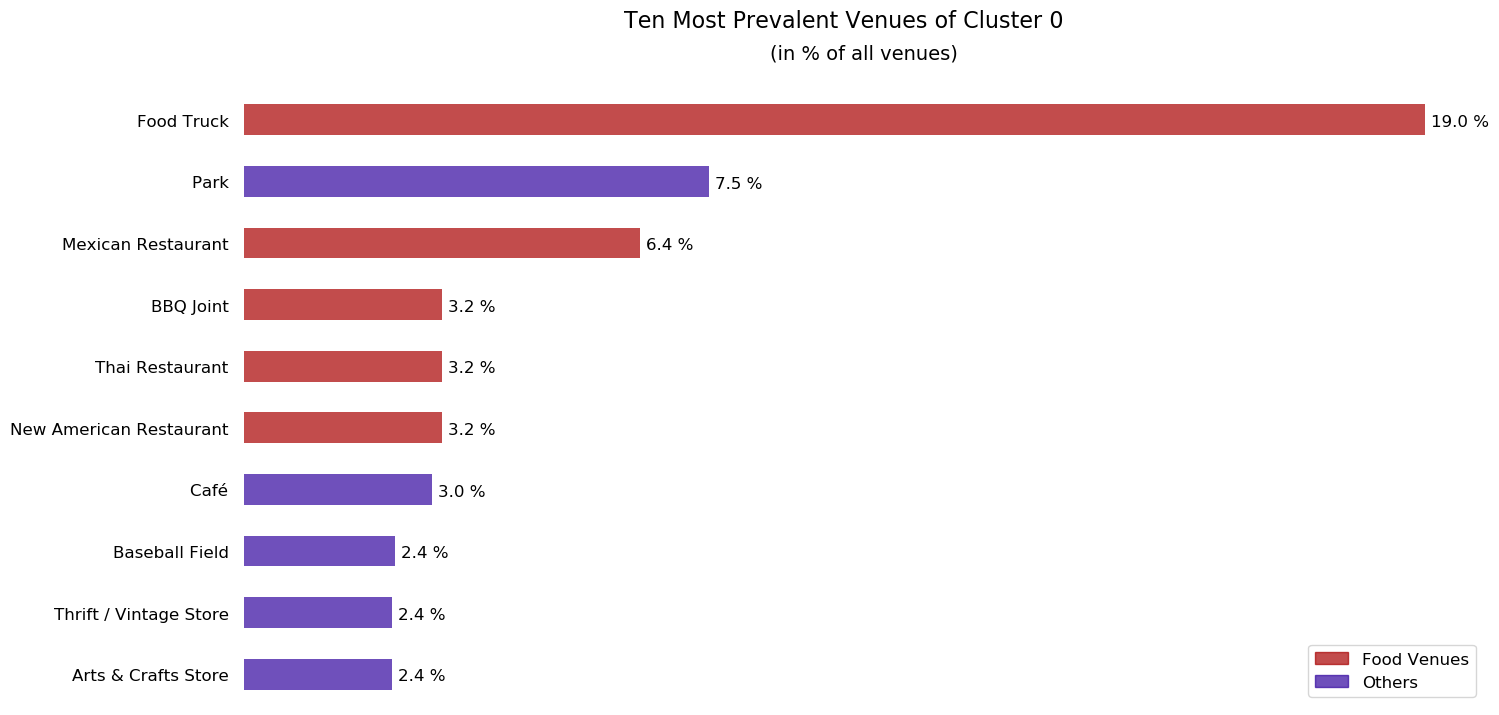

In [119]:
cluster0=pd.DataFrame(cluster_results.iloc[0,0:-1]).transpose()
cluster0.sort_values(by='Cluster 0',axis=1,ascending=False,inplace=True)
display(cluster0)

clus0=cluster0.iloc[0,9::-1]
generate_plot(clus0,0)

### There are 5 food venues in the top 10 venues of Cluster 0 with Food Truck and Mexican Restaurants making up nearly 25% of all venues. These facts indicate that Cluster 0 would not be the best one to explore further in terms of setting up a new restaurant.

## Let's examine Cluster 1

Mexican Restaurant  Coffee Shop  Art Gallery  Garden Center  Farm  \
Cluster 1                0.15          0.1          0.1            0.1   0.1   

           Deli / Bodega  Bakery  Tex-Mex Restaurant  Bike Shop   Bar  \
Cluster 1           0.05    0.05                0.05       0.05  0.05   

           Tea Room  Dive Bar  Arcade  American Restaurant  Pawn Shop  \
Cluster 1      0.05      0.05    0.05                 0.05        0.0   

           Nightclub  New American Restaurant  Optical Shop  \
Cluster 1        0.0                      0.0           0.0   

           Outdoor Sculpture  Park  Music Venue  Office  Peruvian Restaurant  \
Cluster 1                0.0   0.0          0.0     0.0                  0.0   

           Performing Arts Venue  Moving Target  Pet Store  Pharmacy  \
Cluster 1                    0.0            0.0        0.0       0.0   

           Photography Studio  Pizza Place  Playground  Pool  Pool Hall  \
Cluster 1                 0.0          0.0         0.0   0.0        0.0   

           Music Store  Adult Boutique  Movie Theater  Motel  \
Cluster 1          0.0             0.0            0.0    0.0   

           Japanese Restaurant  Jazz Club  Jewelry Store  Juice Bar  \
Cluster 1                  0.0        0.0            0.0        0.0   

           Karaoke Bar  Kids Store  Korean Restaurant  Lake  \
Cluster 1          0.0         0.0                0.0   0.0   

           Latin American Restaurant  Lingerie Store  Liquor Store  Lounge  \
Cluster 1                        0.0             0.0           0.0     0.0   

           Massage Studio  Mattress Store  Mediterranean Restaurant  \
Cluster 1             0.0             0.0                       0.0   

           Men's Store  Middle Eastern Restaurant  Pub  Mobile Phone Shop  \
Cluster 1          0.0                        0.0  0.0                0.0   

           Miscellaneous Shop  Rental Car Location  Public Art  Theater  \
Cluster 1                 0.0                  0.0         0.0      0.0   

           Speakeasy  Sporting Goods Shop  Sports Bar  Steakhouse  \
Cluster 1        0.0                  0.0         0.0         0.0   

           Supplement Shop  Sushi Restaurant  Taco Place  Tattoo Parlor  \
Cluster 1              0.0               0.0         0.0            0.0   

           Thai Restaurant  Thrift / Vintage Store  Record Shop  \
Cluster 1              0.0                     0.0          0.0   

           Toy / Game Store  Trail  Vegetarian / Vegan Restaurant  \
Cluster 1               0.0    0.0                            0.0   

           Veterinarian  Video Game Store  Video Store  Vietnamese Restaurant  \
Cluster 1           0.0               0.0          0.0                    0.0   

           Wine Bar  Women's Store  Spa  Souvenir Shop  Snack Place  \
Cluster 1       0.0            0.0  0.0            0.0          0.0   

           Smoothie Shop  Recording Studio  Recreation Center  \
Cluster 1            0.0               0.0                0.0   

           Israeli Restaurant  Rental Service  \
Cluster 1                 0.0             0.0   

           Residential Building (Apartment / Condo)  Restaurant  River  \
Cluster 1                                       0.0         0.0    0.0   

           Rock Club  Russian Restaurant  Salad Place  Salon / Barbershop  \
Cluster 1        0.0                 0.0          0.0                 0.0   

           Sandwich Place  Scenic Lookout  Science Museum  Seafood Restaurant  \
Cluster 1             0.0             0.0             0.0                 0.0   

           Shipping Store  Shoe Store  Shopping Mall  Smoke Shop  \
Cluster 1             0.0         0.0            0.0         0.0   

           Italian Restaurant  Hotel  Irish Pub  Bus Station  \
Cluster 1                 0.0    0.0        0.0          0.0   

           Business Service  Café  Cajun / Creole Restaurant  Campground  \
Cluster 1               0.0   0.0                        0

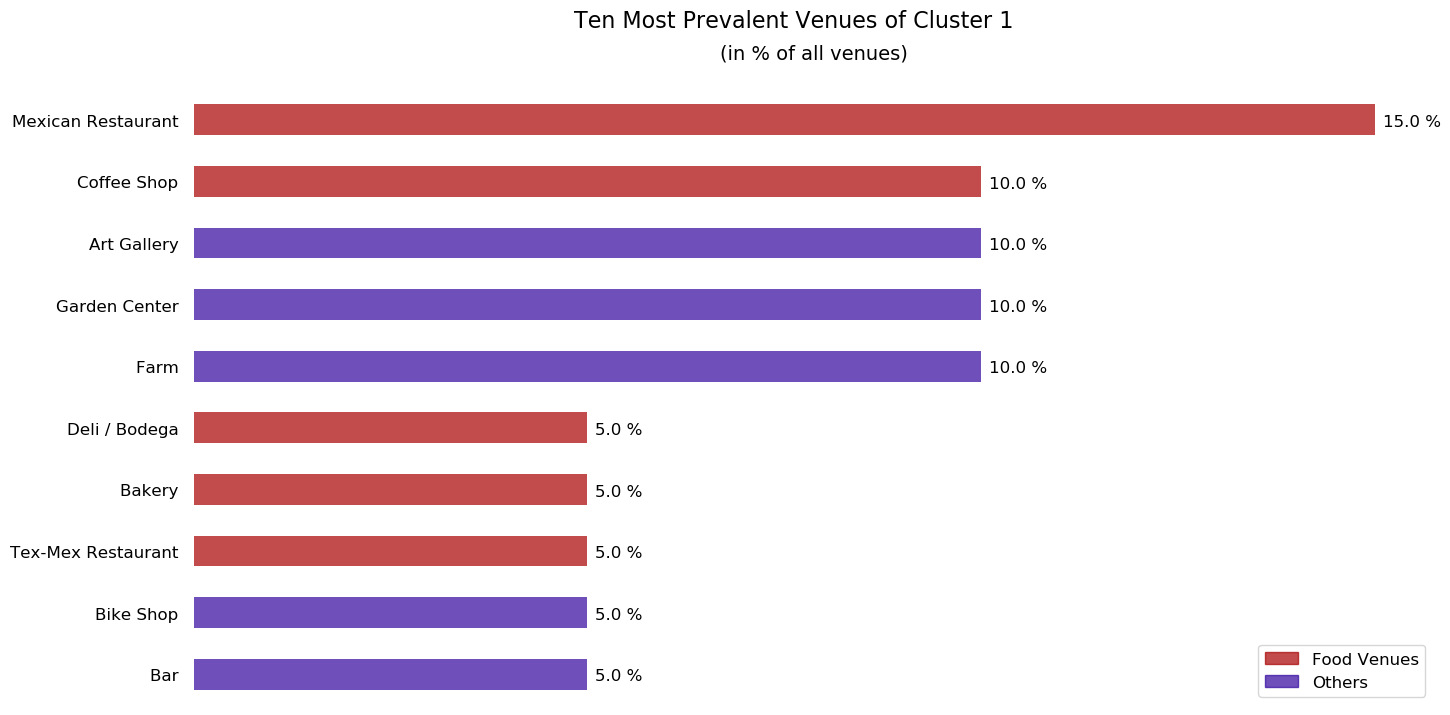

In [120]:
cluster1=pd.DataFrame(cluster_results.iloc[1,0:-1]).transpose()
cluster1.sort_values(by='Cluster 1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

### There are 5 food venues in the top 10 venues of Cluster 1 with Mexican Restaurants making up a huge majority (nearly 20%) of all venues. Adding to this other than 1 art gallery there are not enough venues to create required foot traffic for a new restaurant, so  Cluster 1 need not be looked into any further.

## Let's examine Cluster 2

Coffee Shop  Pizza Place  Mexican Restaurant  Food Truck      Park  \
Cluster 2     0.042521     0.040159            0.029776    0.028892  0.023912   

                Bar  Taco Place      Café     Hotel  Sandwich Place  \
Cluster 2  0.022182    0.020559  0.019738  0.019498        0.019428   

           Cosmetics Shop       Gym  Italian Restaurant  Convenience Store  \
Cluster 2        0.018656  0.018608            0.016726            0.01599   

           American Restaurant       Spa  Pharmacy   Bakery  Clothing Store  \
Cluster 2             0.015697  0.014854  0.014135  0.01308        0.012258   

           Gift Shop  Cocktail Bar  Deli / Bodega  Burger Joint  Men's Store  \
Cluster 2   0.011662      0.010373       0.010199      0.009685     0.009414   

           Music Store  BBQ Joint  Asian Restaurant  Grocery Store     Trail  \
Cluster 2     0.008882   0.008855          0.008763       0.008727  0.008583   

            Theater  Arts & Crafts Store  Recreation Center  Juice Bar  \
Cluster 2  0.008397             0.008257           0.007961   0.007955   

           Ice Cream Shop       Pub  Shipping Store  Automotive Shop  \
Cluster 2        0.007953  0.007812        0.007807         0.007719   

           New American Restaurant  Health & Beauty Service  Video Store  \
Cluster 2                 0.007711                 0.007444     0.007385   

           Liquor Store  Sushi Restaurant  Garden Center  Donut Shop  \
Cluster 2      0.007348          0.007041       0.006944    0.006936   

           Restaurant  Vegetarian / Vegan Restaurant  Gym / Fitness Center  \
Cluster 2    0.006725                       0.006681              0.006429   

           Veterinarian   Brewery  Chinese Restaurant  Cupcake Shop  \
Cluster 2      0.006378  0.006288            0.006236      0.006207   

           Bridal Shop  Athletics & Sports  Yoga Studio  Music Venue  \
Cluster 2     0.006149            0.006076     0.006066     0.006052   

           Speakeasy      Bank  Shoe Store  Candy Store  Miscellaneous Shop  \
Cluster 2   0.006019  0.005951    0.005513     0.005511            0.005428   

           Mobile Phone Shop  Bus Stop  Steakhouse  Fried Chicken Joint  \
Cluster 2           0.005391  0.005337    0.005299             0.005052   

           Middle Eastern Restaurant  Rental Car Location  \
Cluster 2                   0.004986             0.004909   

           Thrift / Vintage Store  Bookstore  Women's Store  Playground  \
Cluster 2                0.004896   0.004816       0.004816    0.004735   

           Japanese Restaurant    Lounge  Hotel Bar  Jewelry Store  Boutique  \
Cluster 2             0.004727  0.004676   0.004676       0.004631  0.004549   

           History Museum  Breakfast Spot  Seafood Restaurant  Dance Studio  \
Cluster 2        0.004508        0.004492            0.004474      0.004343   

            Gay Bar  Furniture / Home Store  Salon / Barbershop  Pet Store  \
Cluster 2  0.004259                0.004144            0.004126   0.004003   

           Dive Bar  Concert Hall  Karaoke Bar  Vietnamese Restaurant  \
Cluster 2  0.003917       0.00386     0.003788                0.00368   

           Tea Room  Photography Studio  Hawaiian Restaurant  \
Cluster 2  0.003551            0.003472             0.003472   

           Cuban Restaurant  Community Center  Beer Bar  Gun Shop  \
Cluster 2          0.003472          0.003472  0.003472  0.003472   

           Burrito Place  Performing Arts Venue  Mediterranean Restaurant  \
Cluster 2       0.003472               0.003443                  0.003426   

           Bed & Breakfast  Recording Studio  Discount Store  Gourmet Shop  \
Cluster 2         0.003383          0.003205        0.003205      0.003173   

           Flower Shop  Thai Restaurant  Hookah Bar  Video Game Store  \
Cluster 2     0.003173         0.003009    0.002778          0.002778   

           Electronics Store  Sports Bar  Frame Store  Fast Food Restaurant  \
Cluster 2       

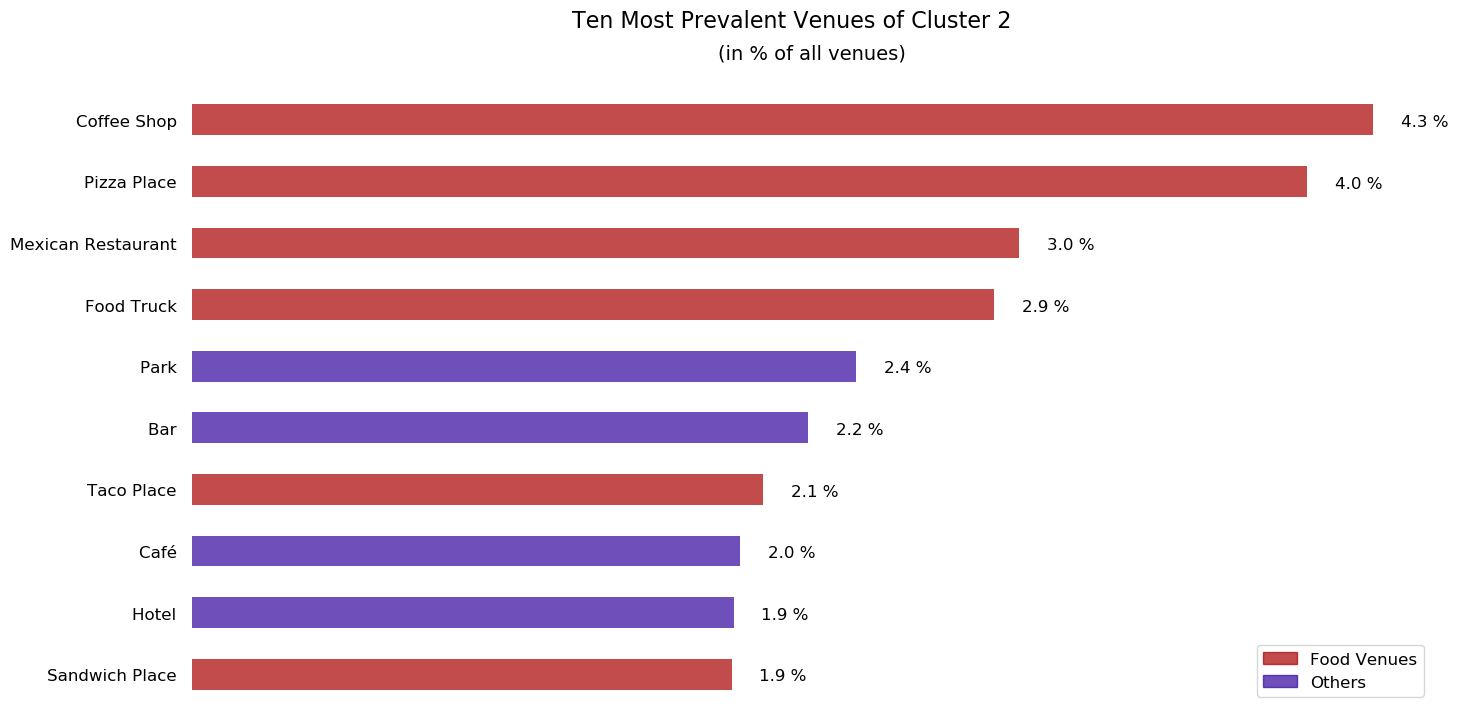

In [122]:
cluster2=pd.DataFrame(cluster_results.iloc[2,0:-1]).transpose()
cluster2.sort_values(by='Cluster 2',axis=1,ascending=False,inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,9::-1]
generate_plot(clus2,2)

### There are 6 food venues in the top 10 venues of Cluster 2 with Mexican Restaurants making up a huge majority (nearly 20%) of all venues. Adding to this other than 1 art gallery there are not enough venues to create required foot traffic for a new restaurant, so  Cluster 1 need not be looked into any further.

## Let's examine Cluster 3

Convenience Store  Video Store  Pizza Place  Donut Shop  \
Cluster 3           0.132576     0.128788     0.087121    0.045455   

           Fast Food Restaurant      Park  Smoke Shop  \
Cluster 3              0.045455  0.045455    0.045455   

           Cajun / Creole Restaurant  Sporting Goods Shop  Chinese Restaurant  \
Cluster 3                   0.045455             0.045455            0.045455   

           Gym / Fitness Center  Sandwich Place  Pool Hall  Home Service  \
Cluster 3              0.041667        0.041667   0.041667      0.041667   

           Rental Service  Pharmacy  Bus Station  Music Venue  \
Cluster 3        0.041667  0.041667     0.041667     0.041667   

           Outdoor Sculpture  Optical Shop  Office  Peruvian Restaurant  \
Cluster 3                0.0           0.0     0.0                  0.0   

           Pawn Shop  Pet Store  Nightclub  New American Restaurant  \
Cluster 3        0.0        0.0        0.0                      0.0   

           Moving Target  Music Store  Photography Studio  \
Cluster 3            0.0          0.0                 0.0   

           Performing Arts Venue  Adult Boutique  Movie Theater  Playground  \
Cluster 3                    0.0             0.0            0.0         0.0   

           Italian Restaurant  Japanese Restaurant  Jazz Club  Jewelry Store  \
Cluster 3                 0.0                  0.0        0.0            0.0   

           Juice Bar  Karaoke Bar  Kids Store  Korean Restaurant  Lake  \
Cluster 3        0.0          0.0         0.0                0.0   0.0   

           Latin American Restaurant  Lingerie Store  Liquor Store  Lounge  \
Cluster 3                        0.0             0.0           0.0     0.0   

           Massage Studio  Mattress Store  Mediterranean Restaurant  \
Cluster 3             0.0             0.0                       0.0   

           Men's Store  Mexican Restaurant  Middle Eastern Restaurant  \
Cluster 3          0.0                 0.0                        0.0   

           Miscellaneous Shop  Mobile Phone Shop  Motel  Recording Studio  \
Cluster 3                 0.0                0.0    0.0               0.0   

           Pool  Spa  Sports Bar  Steakhouse  Supplement Shop  \
Cluster 3   0.0  0.0         0.0         0.0              0.0   

           Sushi Restaurant  Taco Place  Tattoo Parlor  Tea Room  \
Cluster 3               0.0         0.0            0.0       0.0   

           Tex-Mex Restaurant  Thai Restaurant  Theater  \
Cluster 3                 0.0              0.0      0.0   

           Thrift / Vintage Store  Toy / Game Store  Trail  \
Cluster 3                     0.0               0.0    0.0   

           Vegetarian / Vegan Restaurant  Veterinarian  Video Game Store  \
Cluster 3                            0.0           0.0               0.0   

           Vietnamese Restaurant  Wine Bar  Women's Store  Speakeasy  \
Cluster 3                    0.0       0.0            0.0        0.0   

           Souvenir Shop  Pub  Snack Place  Public Art  Record Shop  \
Cluster 3            0.0  0.0          0.0         0.0          0.0   

           Irish Pub  Recreation Center  Rental Car Location  \
Cluster 3        0.0                0.0                  0.0   

           Residential Building (Apartment / Condo)  Restaurant  River  \
Cluster 3                                       0.0         0.0    0.0   

           Rock Club  Russian Restaurant  Salad Place  Salon / Barbershop  \
Cluster 3        0.0                 0.0          0.0                 0.0   

           Scenic Lookout  Science Museum  Seafood Restaurant  Shipping Store  \
Cluster 3             0.0             0.0                 0.0             0.0   

           Shoe Store  Shopping Mall  Smoothie Shop  Israeli Restaurant  \
Cluster 3         0.0            0.0            0.0                 0.0   

           Hotel  Indie Movie Theater  Capitol Building  Bubble Tea Shop  \
Cluster 3    0.0                  0.0       

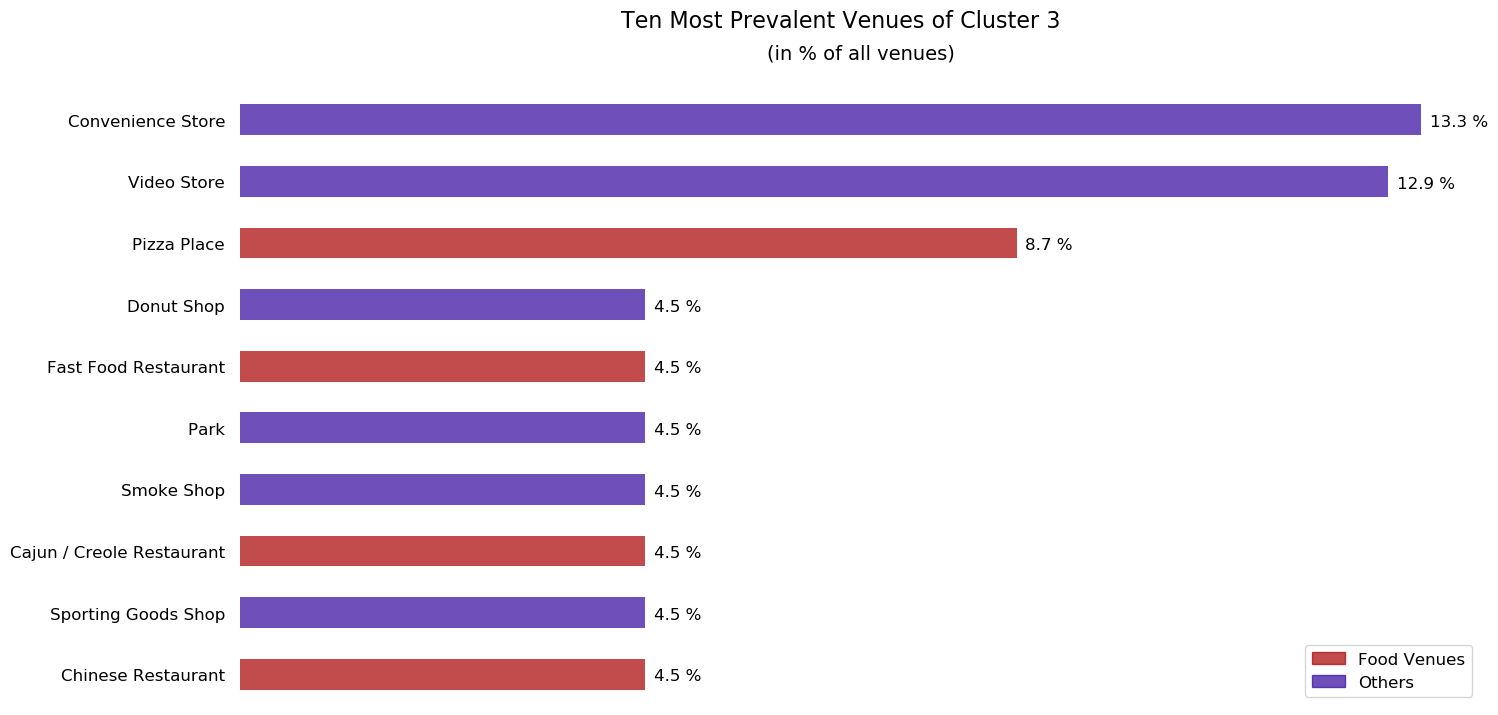

In [123]:
cluster3=pd.DataFrame(cluster_results.iloc[3,0:-1]).transpose()
cluster3.sort_values(by='Cluster 3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,9::-1]
generate_plot(clus3,3)

### There are 4 food venues in the top 10 venues of Cluster 3 mostly fast food, but not many restaurants. There is a Park and shopping places which are favorable indicators of foot traffic, which can be optimal for new restaurant. Befor we finalize on the cluster, let's look at the last cluster.

## Let's examine Cluster 4

Convenience Store  Mexican Restaurant  Taco Place      Park  \
Cluster 4           0.142857            0.142857    0.142857  0.071429   

             Office  Art Gallery      Food  Pet Store  Music Store  \
Cluster 4  0.071429     0.071429  0.071429   0.071429     0.071429   

           Restaurant  Music Venue  Movie Theater  Moving Target  \
Cluster 4    0.071429     0.071429            0.0            0.0   

           New American Restaurant  Nightclub  Adult Boutique  Optical Shop  \
Cluster 4                      0.0        0.0             0.0           0.0   

           Outdoor Sculpture  Mobile Phone Shop  Pawn Shop  \
Cluster 4                0.0                0.0        0.0   

           Performing Arts Venue  Peruvian Restaurant  Pharmacy  \
Cluster 4                    0.0                  0.0       0.0   

           Photography Studio  Pizza Place  Playground  Motel  \
Cluster 4                 0.0          0.0         0.0    0.0   

           Middle Eastern Restaurant  Miscellaneous Shop  Kids Store  \
Cluster 4                        0.0                 0.0         0.0   

           Indie Movie Theater  Irish Pub  Israeli Restaurant  \
Cluster 4                  0.0        0.0                 0.0   

           Italian Restaurant  Japanese Restaurant  Jazz Club  Jewelry Store  \
Cluster 4                 0.0                  0.0        0.0            0.0   

           Juice Bar  Karaoke Bar  Korean Restaurant  Pool Hall  Lake  \
Cluster 4        0.0          0.0                0.0        0.0   0.0   

           Latin American Restaurant  Lingerie Store  Liquor Store  Lounge  \
Cluster 4                        0.0             0.0           0.0     0.0   

           Massage Studio  Mattress Store  Mediterranean Restaurant  \
Cluster 4             0.0             0.0                       0.0   

           Men's Store  Pool  Record Shop  Pub  Theater  Sporting Goods Shop  \
Cluster 4          0.0   0.0          0.0  0.0      0.0                  0.0   

           Sports Bar  Steakhouse  Supplement Shop  Sushi Restaurant  \
Cluster 4         0.0         0.0              0.0               0.0   

           Tattoo Parlor  Tea Room  Tex-Mex Restaurant  Thai Restaurant  \
Cluster 4            0.0       0.0                 0.0              0.0   

           Thrift / Vintage Store  Spa  Toy / Game Store  Trail  \
Cluster 4                     0.0  0.0               0.0    0.0   

           Vegetarian / Vegan Restaurant  Veterinarian  Video Game Store  \
Cluster 4                            0.0           0.0               0.0   

           Video Store  Vietnamese Restaurant  Wine Bar  Women's Store  \
Cluster 4          0.0                    0.0       0.0            0.0   

           Speakeasy  Souvenir Shop  Public Art  Salad Place  Ice Cream Shop  \
Cluster 4        0.0            0.0         0.0          0.0             0.0   

           Recording Studio  Recreation Center  Rental Car Location  \
Cluster 4               0.0                0.0                  0.0   

           Rental Service  Residential Building (Apartment / Condo)  River  \
Cluster 4             0.0                                       0.0    0.0   

           Rock Club  Russian Restaurant  Salon / Barbershop  Snack Place  \
Cluster 4        0.0                 0.0                 0.0          0.0   

           Sandwich Place  Scenic Lookout  Science Museum  Seafood Restaurant  \
Cluster 4             0.0             0.0             0.0                 0.0   

           Shipping Store  Shoe Store  Shopping Mall  Smoke Shop  \
Cluster 4             0.0         0.0            0.0         0.0   

           Smoothie Shop  Indian Restaurant  Hotel  Hotel Bar  \
Cluster 4            0.0                0.0    0.0        0.0   

           Capitol Building  Burrito Place  Bus Line  Bus Station  Bus Stop  \
Cluster 4               0.0            0.0       0.0          0.0       0.0   

           Business Service  Café  Cajun / Creole 

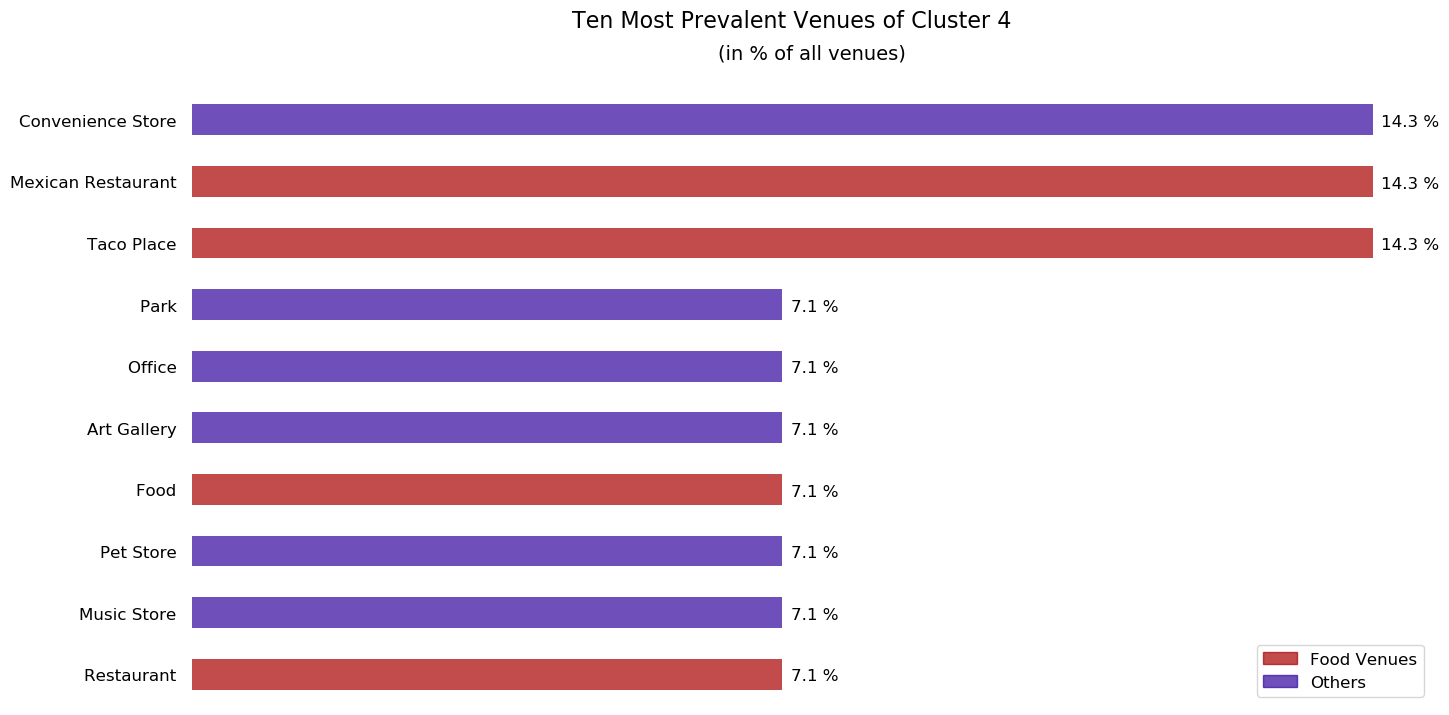

In [124]:
cluster4=pd.DataFrame(cluster_results.iloc[4,0:-1]).transpose()
cluster4.sort_values(by='Cluster 4',axis=1,ascending=False,inplace=True)
display(cluster4)

clus4=cluster4.iloc[0,9::-1]
generate_plot(clus4,4)

### There are only 4 food venues in the top 10 venues of Cluster 4 with only 2 of them qualified as full serving restaurants. Additionally, compared to cluster 3 there are a lot of public venues in this cluster - venues that see a lot of foot traffic such as parks, art gallery, office and department stores. The presence of these high traffic places sugest cluster 4 as optimal place for the new restaurant.

# Conclusion

## To conclude, cluster 4 that includes central East Austin, Barton Creek and Bouldin Creek are optimal locations for a new Italian Restaurant. Due to the presence of Office venues, Park, Art Gallery and several stores, it brings in significant foot traffic (customers) required for the new restaurant. Adding to this, there are no italian restaurants in top 10 venues which will aid in profitabilty.